In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 15,6

In [2]:
#Note: aim is not to teach stock price forecasting. It's a very complex domain and I have almost no clue about it. Here I will demonstrate the various techniques which can be used for time-series forecasting
data = pd.read_csv('AirPassengers.csv')
print (data.head())
print( '\n Data Types:')
print(data.dtypes)

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121

 Data Types:
Month          object
#Passengers     int64
dtype: object


In [3]:
data_parser = lambda dates : pd.datetime.strptime(dates, '%Y-%m')

In [4]:
data_parser('1010-10')

C:\Users\Sunil\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


datetime.datetime(1010, 10, 1, 0, 0)

In [5]:
data = pd.read_csv('AirPassengers.csv', index_col='Month', parse_dates=['Month'], date_parser=data_parser)

C:\Users\Sunil\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


In [6]:
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [8]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [9]:
ts = data['#Passengers']

In [10]:
ts.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

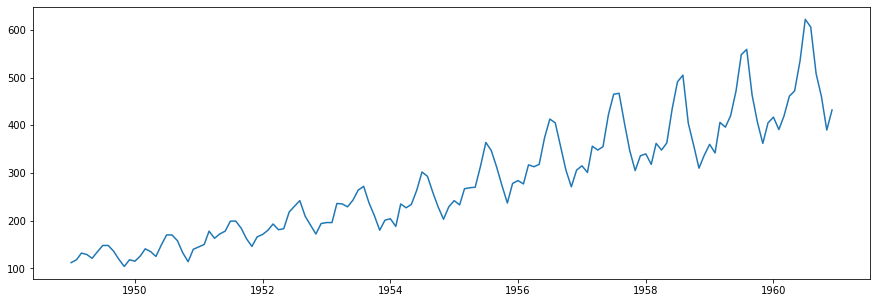

In [11]:
plt.figure(figsize=(15,5))
plt.plot(ts)

In [12]:
from statsmodels.tsa.stattools import adfuller

In [13]:
def stationary_test(time_series):
    
    # Rolling Statistics
    rolling_mean = time_series.rolling(window = 12).mean()
    rolling_std = time_series.rolling(window = 12).std()
    
    # Plotting the statistics
    plt.figure(figsize=(12, 5))
    Original = plt.plot(time_series, label="Original", color='black')
    Mean = plt.plot(rolling_mean, label="Mean", color='blue')
    Std = plt.plot(rolling_std, label="Std", color='red')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    
    # Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(time_series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

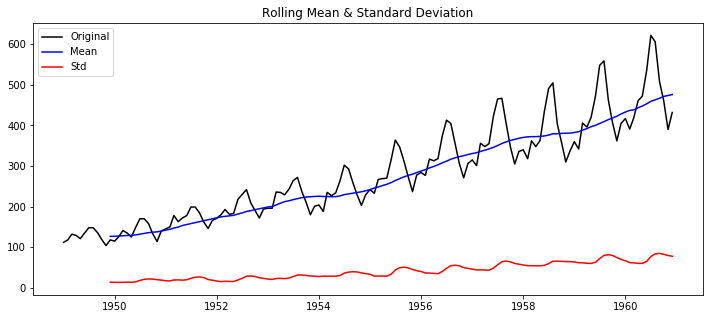

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [14]:
stationary_test(ts)

# Making the TimeSeries Stationary

## Estimating and Eliminating Trend

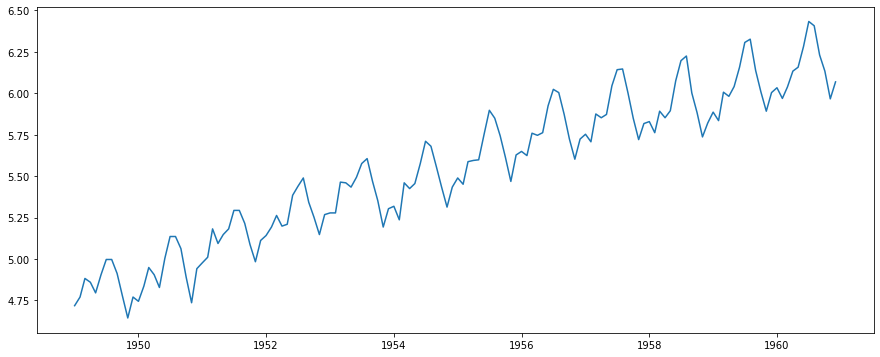

In [15]:
ts_log = np.log(ts)
plt.plot(ts_log)

## Smoothing
#### Moving Average

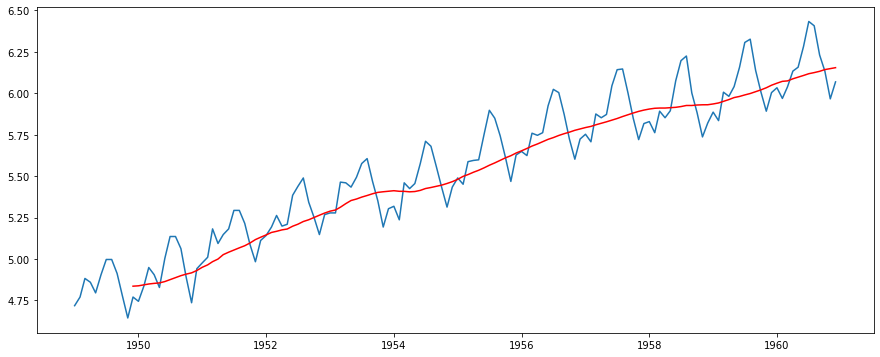

In [16]:
moving_avg = ts_log.rolling(window=12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color = 'red')

In [17]:
ts_log_moving_avg_diff = ts_log - moving_avg

In [18]:
ts_log_moving_avg_diff.head(12)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
Name: #Passengers, dtype: float64

In [19]:
ts_log_moving_avg_diff.dropna(inplace=True)

In [20]:
ts_log_moving_avg_diff.head()

Month
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
Name: #Passengers, dtype: float64

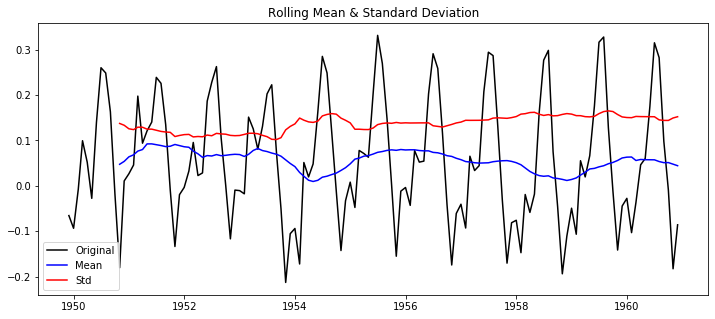

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [21]:
stationary_test(ts_log_moving_avg_diff)

### Exponentially Weighted Moving Average

In [22]:
exp_weight_moving_avg = ts_log.ewm(halflife=12).mean()

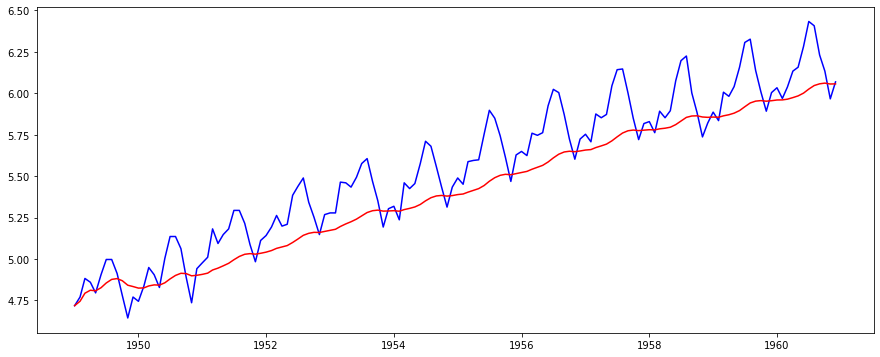

In [23]:
plt.plot(ts_log, color = 'blue')
plt.plot(exp_weight_moving_avg, color = 'red')

In [24]:
exp_weight_moving_avg.head()

Month
1949-01-01    4.718499
1949-02-01    4.745345
1949-03-01    4.793835
1949-04-01    4.811785
1949-05-01    4.808206
Name: #Passengers, dtype: float64

In [25]:
ts_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
Name: #Passengers, dtype: float64

In [26]:
ts_log_and_ewm_diff = ts_log - exp_weight_moving_avg

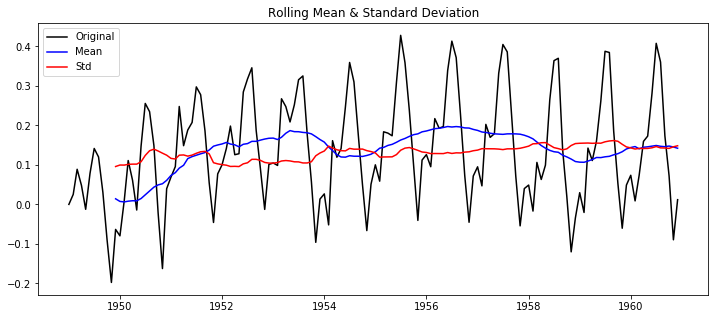

Results of Dickey-Fuller Test:
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [27]:
stationary_test(ts_log_and_ewm_diff)

## Eliminating Trend and Seasonality

### Differencing:

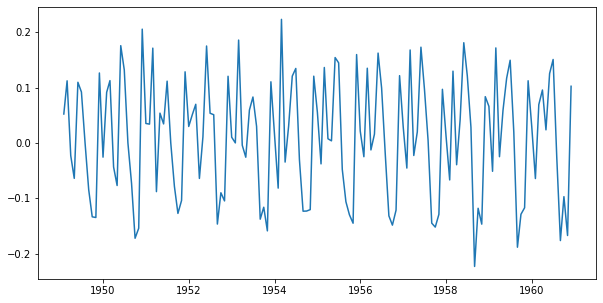

In [28]:
# 1st Difference
plt.figure(figsize=(10,5))
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

<Figure size 864x432 with 0 Axes>

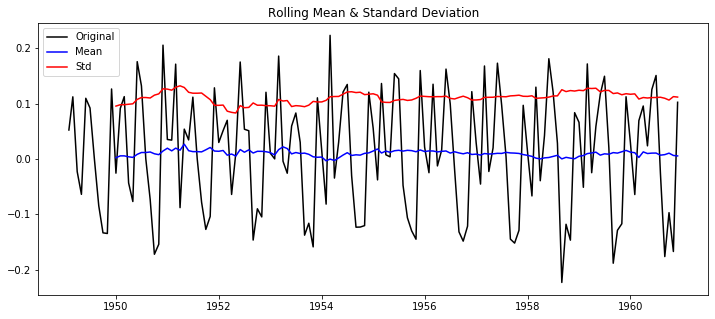

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [29]:
plt.figure(figsize=(12,6))
ts_log_diff.dropna(inplace=True)
stationary_test(ts_log_diff)

### Decomposition:

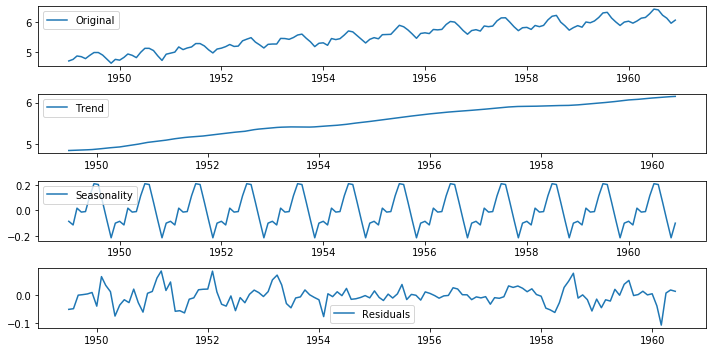

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ts_log)


trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(10,5))

plt.subplot(411)
plt.plot(ts_log, label = 'Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label = 'Seasonality')
plt.legend(loc='best')


plt.subplot(414)
plt.plot(residual, label = 'Residuals')
plt.legend(loc='best')

plt.tight_layout()

<Figure size 864x360 with 0 Axes>

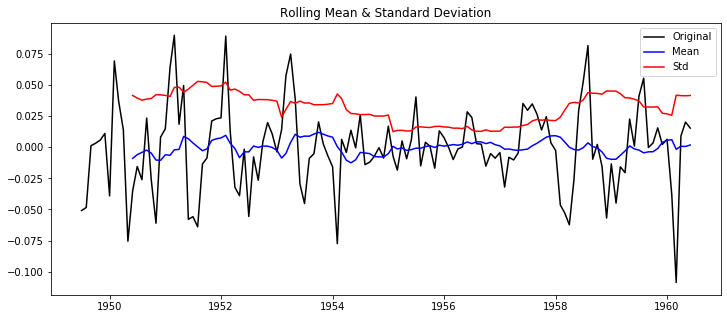

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [31]:
plt.figure(figsize=(12,5))

ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
stationary_test(ts_log_decompose)

# Final Forecasting

In [32]:
from statsmodels.tsa.arima_model import ARIMA

### ACF and PACF Plots

In [33]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

C:\Users\Sunil\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


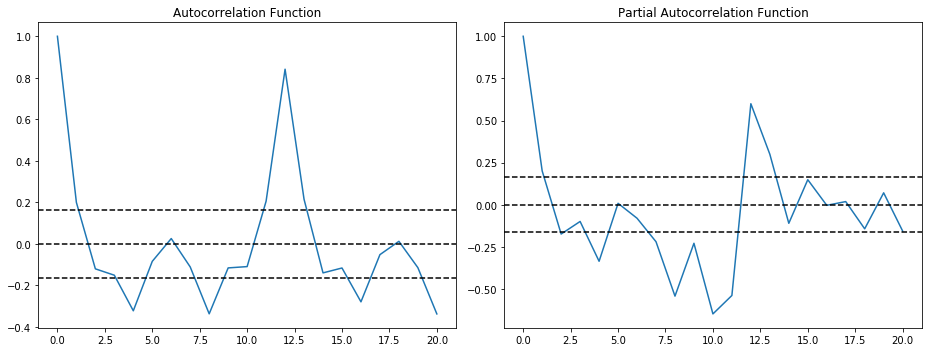

In [34]:
plt.figure(figsize=(13,5))

# ACF

plt.subplot(121)    
plt.plot(lag_acf)

plt.axhline(y = 0, linestyle = '--', color = 'black')
plt.axhline(y = -1.96/np.sqrt(len(ts_log_diff)), linestyle = '--', color = 'black')
plt.axhline(y = 1.96/np.sqrt(len(ts_log_diff)), linestyle = '--', color = 'black')

plt.title("Autocorrelation Function")


# PCF

plt.subplot(122)    
plt.plot(lag_pacf)

plt.axhline(y = 0, linestyle = '--', color = 'black')
plt.axhline(y = -1.96/np.sqrt(len(ts_log_diff)), linestyle = '--', color = 'black')
plt.axhline(y = 1.96/np.sqrt(len(ts_log_diff)), linestyle = '--', color = 'black')

plt.title("Partial Autocorrelation Function")

plt.tight_layout()

## AR Model

C:\Users\Sunil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Sunil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 1.5023')

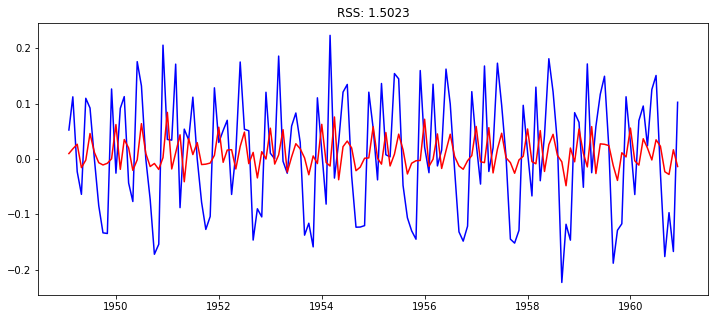

In [35]:
model = ARIMA(ts_log, order=(2, 1, 0))

results_AR = model.fit(disp=-1)

plt.figure(figsize=(12,5))

plt.plot(ts_log_diff, color = 'blue')
plt.plot(results_AR.fittedvalues, color = 'red')

plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

## MA Model

C:\Users\Sunil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Sunil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 1.5023')

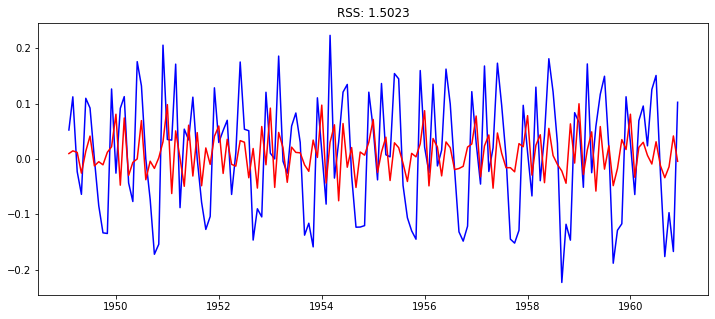

In [36]:
model = ARIMA(ts_log, order=(0, 1, 2))

results_MA = model.fit(disp=-1)

plt.figure(figsize=(12,5))

plt.plot(ts_log_diff, color = 'blue')
plt.plot(results_MA.fittedvalues, color = 'red')

plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

## ARIMA Model

C:\Users\Sunil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Sunil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 1.5023')

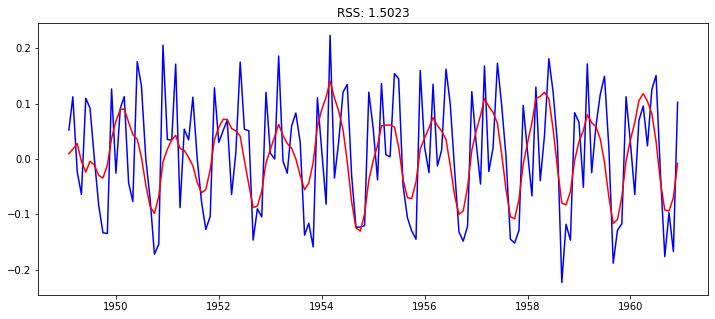

In [37]:
model = ARIMA(ts_log, order = (2, 1, 2))

results_ARIMA = model.fit(disp=-1)

plt.figure(figsize=(12,5))

plt.plot(ts_log_diff, color = 'blue')
plt.plot(results_ARIMA.fittedvalues, color = 'red')

plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

# Converting to Original Scale

In [38]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)

print(predictions_ARIMA_diff.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


In [39]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()

print(predictions_ARIMA_diff_cumsum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [40]:
predictions_ARIMA_log = pd.Series(ts_log.iloc[0], index=ts_log.index)

predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)

predictions_ARIMA_log.head(10)

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
1949-06-01    4.744830
1949-07-01    4.740483
1949-08-01    4.729506
1949-09-01    4.699577
1949-10-01    4.665110
dtype: float64

In [41]:
ts_log.head(10)

Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
1949-06-01    4.905275
1949-07-01    4.997212
1949-08-01    4.997212
1949-09-01    4.912655
1949-10-01    4.779123
Name: #Passengers, dtype: float64

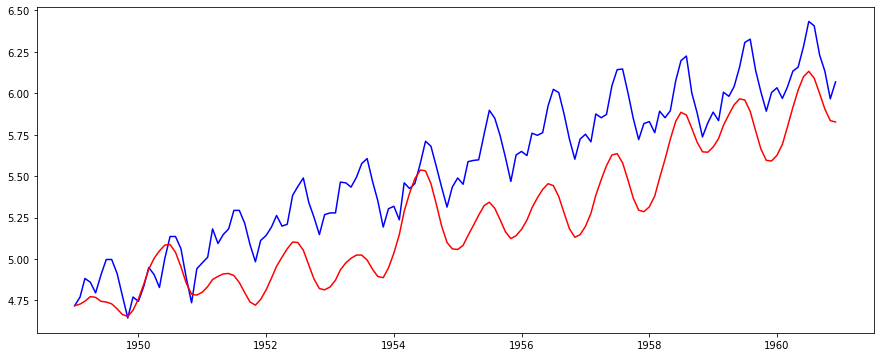

In [42]:
plt.figure(figsize=(15,6))
plt.plot(ts_log, color = 'blue')
plt.plot(predictions_ARIMA_log, color = 'red')

Text(0.5, 1.0, 'RMSE: 90.1044')

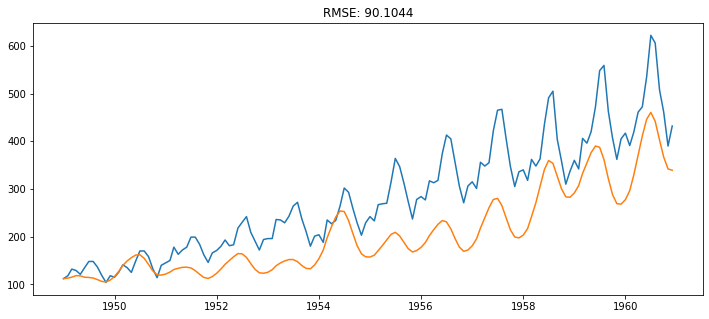

In [43]:
ARIMA_predictions = np.exp(predictions_ARIMA_log)

plt.figure(figsize=(12,5))
plt.plot(ts)
plt.plot(ARIMA_predictions)
plt.title('RMSE: %.4f'% np.sqrt(sum((ARIMA_predictions-ts)**2)/len(ts)))

In [44]:
ARIMA_predictions

Month
1949-01-01    112.000000
1949-02-01    113.078122
1949-03-01    115.073415
1949-04-01    118.301987
1949-05-01    117.768364
                 ...    
1960-08-01    441.886507
1960-09-01    402.905963
1960-10-01    366.753540
1960-11-01    341.984837
1960-12-01    339.216839
Length: 144, dtype: float64

In [45]:
data

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


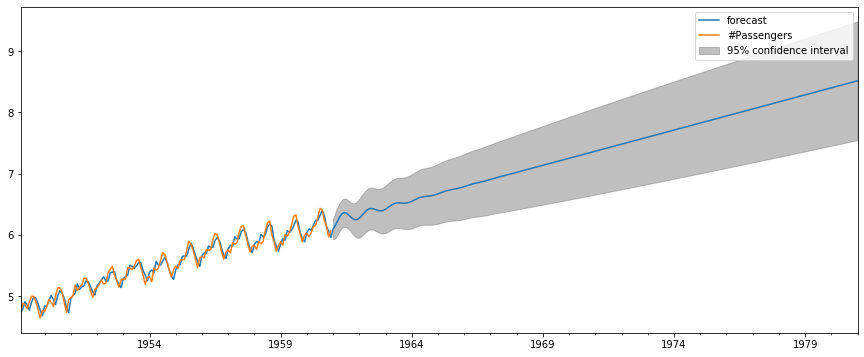

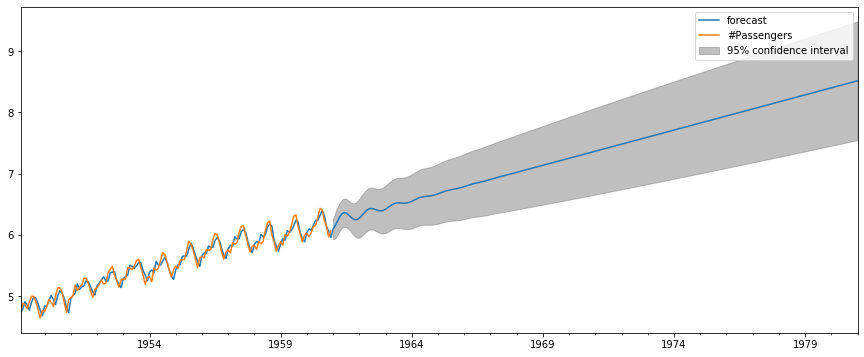

In [46]:
results_ARIMA.plot_predict(1, 384)

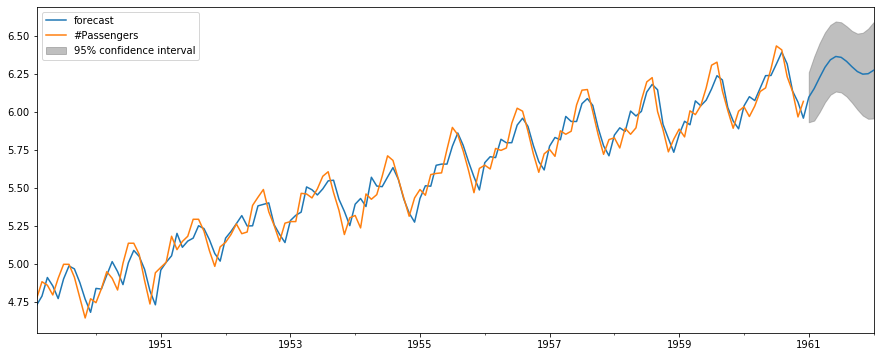

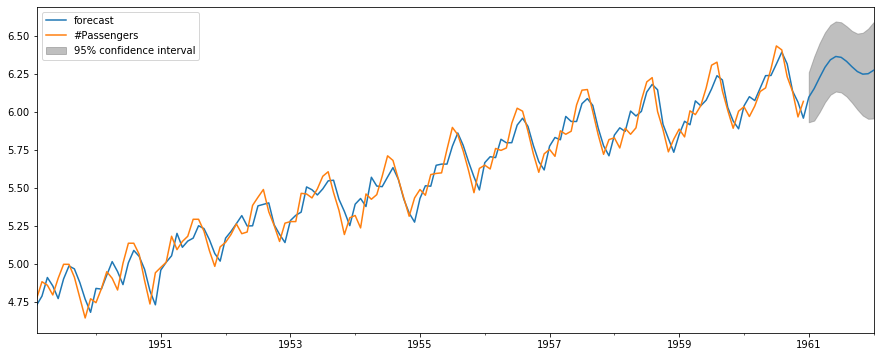

In [47]:
results_ARIMA.plot_predict(1, 156)

In [48]:
X = results_ARIMA.forecast(steps = 156)